In [100]:
from typing import Union
from BayesNet import BayesNet
import BNReasoner
import os


from typing import List, Tuple, Dict
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.readwrite import XMLBIFReader
import math
import itertools
import pandas as pd
from copy import deepcopy

In [101]:
cwd = os.getcwd()
test_file = BNReasoner.BNReasoner(net = f'{cwd}/testing/dog_problem.BIFXML')

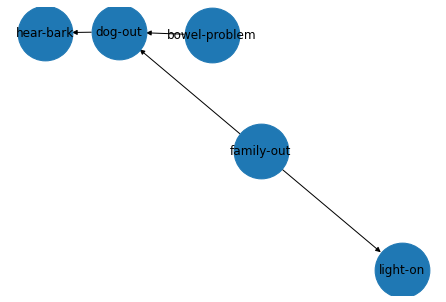

In [102]:
test_file.bn.draw_structure()

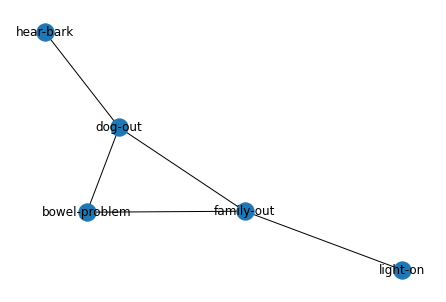

In [103]:
interaction_graph = test_file.bn.get_interaction_graph()
nx.draw(interaction_graph, with_labels = True)

def filter_(x, y):
    count = 0
    for num in x:
        if num not in y:
            count += 1
    return count

In [104]:
interaction_graph = test_file.bn.get_interaction_graph()

length = len(list(interaction_graph.nodes))

for i in range(len(list(interaction_graph.nodes))):
    
    interaction_graph = test_file.bn.get_interaction_graph()
    
    current_least_edges = None
    current_least_edges_count = 1000


    # Set the current node
    node = list(interaction_graph.nodes)[i]
    

    # Find its adjacents
    node_adjacents = interaction_graph.adj[node]
    node_adjacents_list = list(node_adjacents.keys())
    node_list = list(interaction_graph.edges(node))
    node_edges = []
    

    

    for i in range(len(node_list)):
        node_tuples = node_list[i]
        node_edges.append(node_tuples[1])
    
    

    

    # For all adjacents check how many of their edges do not match the root node adjacents
    for j in range(len(node_adjacents_list)):
        child_node = node_adjacents_list[j]

        

        child_node_list = list(interaction_graph.edges(child_node))
        child_node_edges = []


        for g in range(len(child_node_list)):
            child_node_tuples = child_node_list[g]
            child_node_edges.append(child_node_tuples[1])

        

        edge_count = filter_(node_edges, child_node_edges)
        if edge_count < current_least_edges_count:
            current_least_edges = child_node
            current_least_edges_count = edge_count
            






print('Least edges:', current_least_edges)


min_degree_node = current_least_edges















min_degree_node = current_least_edges

min_node_adjacents = interaction_graph.adj[min_degree_node]



Least edges: bowel-problem


In [93]:
adjacents = list(min_node_adjacents.keys())
print('adjacents: ', adjacents )

# if the minimum node has more than 1 adjacent nodes
if len(min_node_adjacents.keys()) > 1:

    # store the adjecent nodes in temp list
    temp_adjacents = adjacents

    #for every adjacent node
    for i in range(len(min_node_adjacents.keys())):
        print('loop:', i)

        # store the current adjacent node and remove it from the list (so it does not create an edge with itself)
        current_adjacent = temp_adjacents[i]
        # temp_adjacents.remove(current_adjacent)
        
        for j in range(len(temp_adjacents)):

            if temp_adjacents[i] == current_adjacent:
                continue
            else:
                interaction_graph.add_edge(current_adjacent, temp_adjacents[j])
    
    print(interaction_graph.nodes)
    print('min degree node:', min_degree_node)
    test_file.bn.del_var(min_degree_node)
    interaction_graph = test_file.bn.get_interaction_graph()
    print(interaction_graph.nodes)
    print('nodes left:', len(interaction_graph.nodes))
        
else:
    if len(list(interaction_graph.nodes)) == 1:
        print('Done')
    else:
        test_file.bn.del_var(min_degree_node)
        interaction_graph = test_file.bn.get_interaction_graph()
        print('nodes left:', len(interaction_graph.nodes))



    


adjacents:  ['light-on', 'bowel-problem', 'dog-out']
loop: 0
loop: 1
loop: 2
['light-on', 'dog-out', 'hear-bark', 'family-out', 'bowel-problem']
min degree node: family-out


NetworkXError: The node family-out is not in the digraph.

In [90]:
print(interaction_graph.nodes)
print()

['light-on', 'dog-out', 'hear-bark', 'family-out', 'bowel-problem']



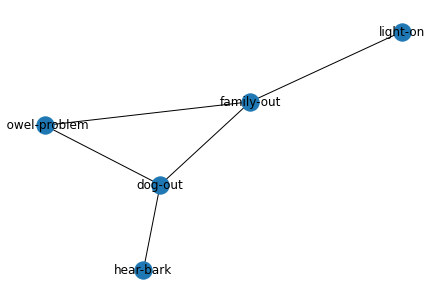

In [94]:
interaction_graph = test_file.bn.get_interaction_graph()
nx.draw(interaction_graph, with_labels = True)